# Introducción a Imagenes Digitales
---

## Filtros

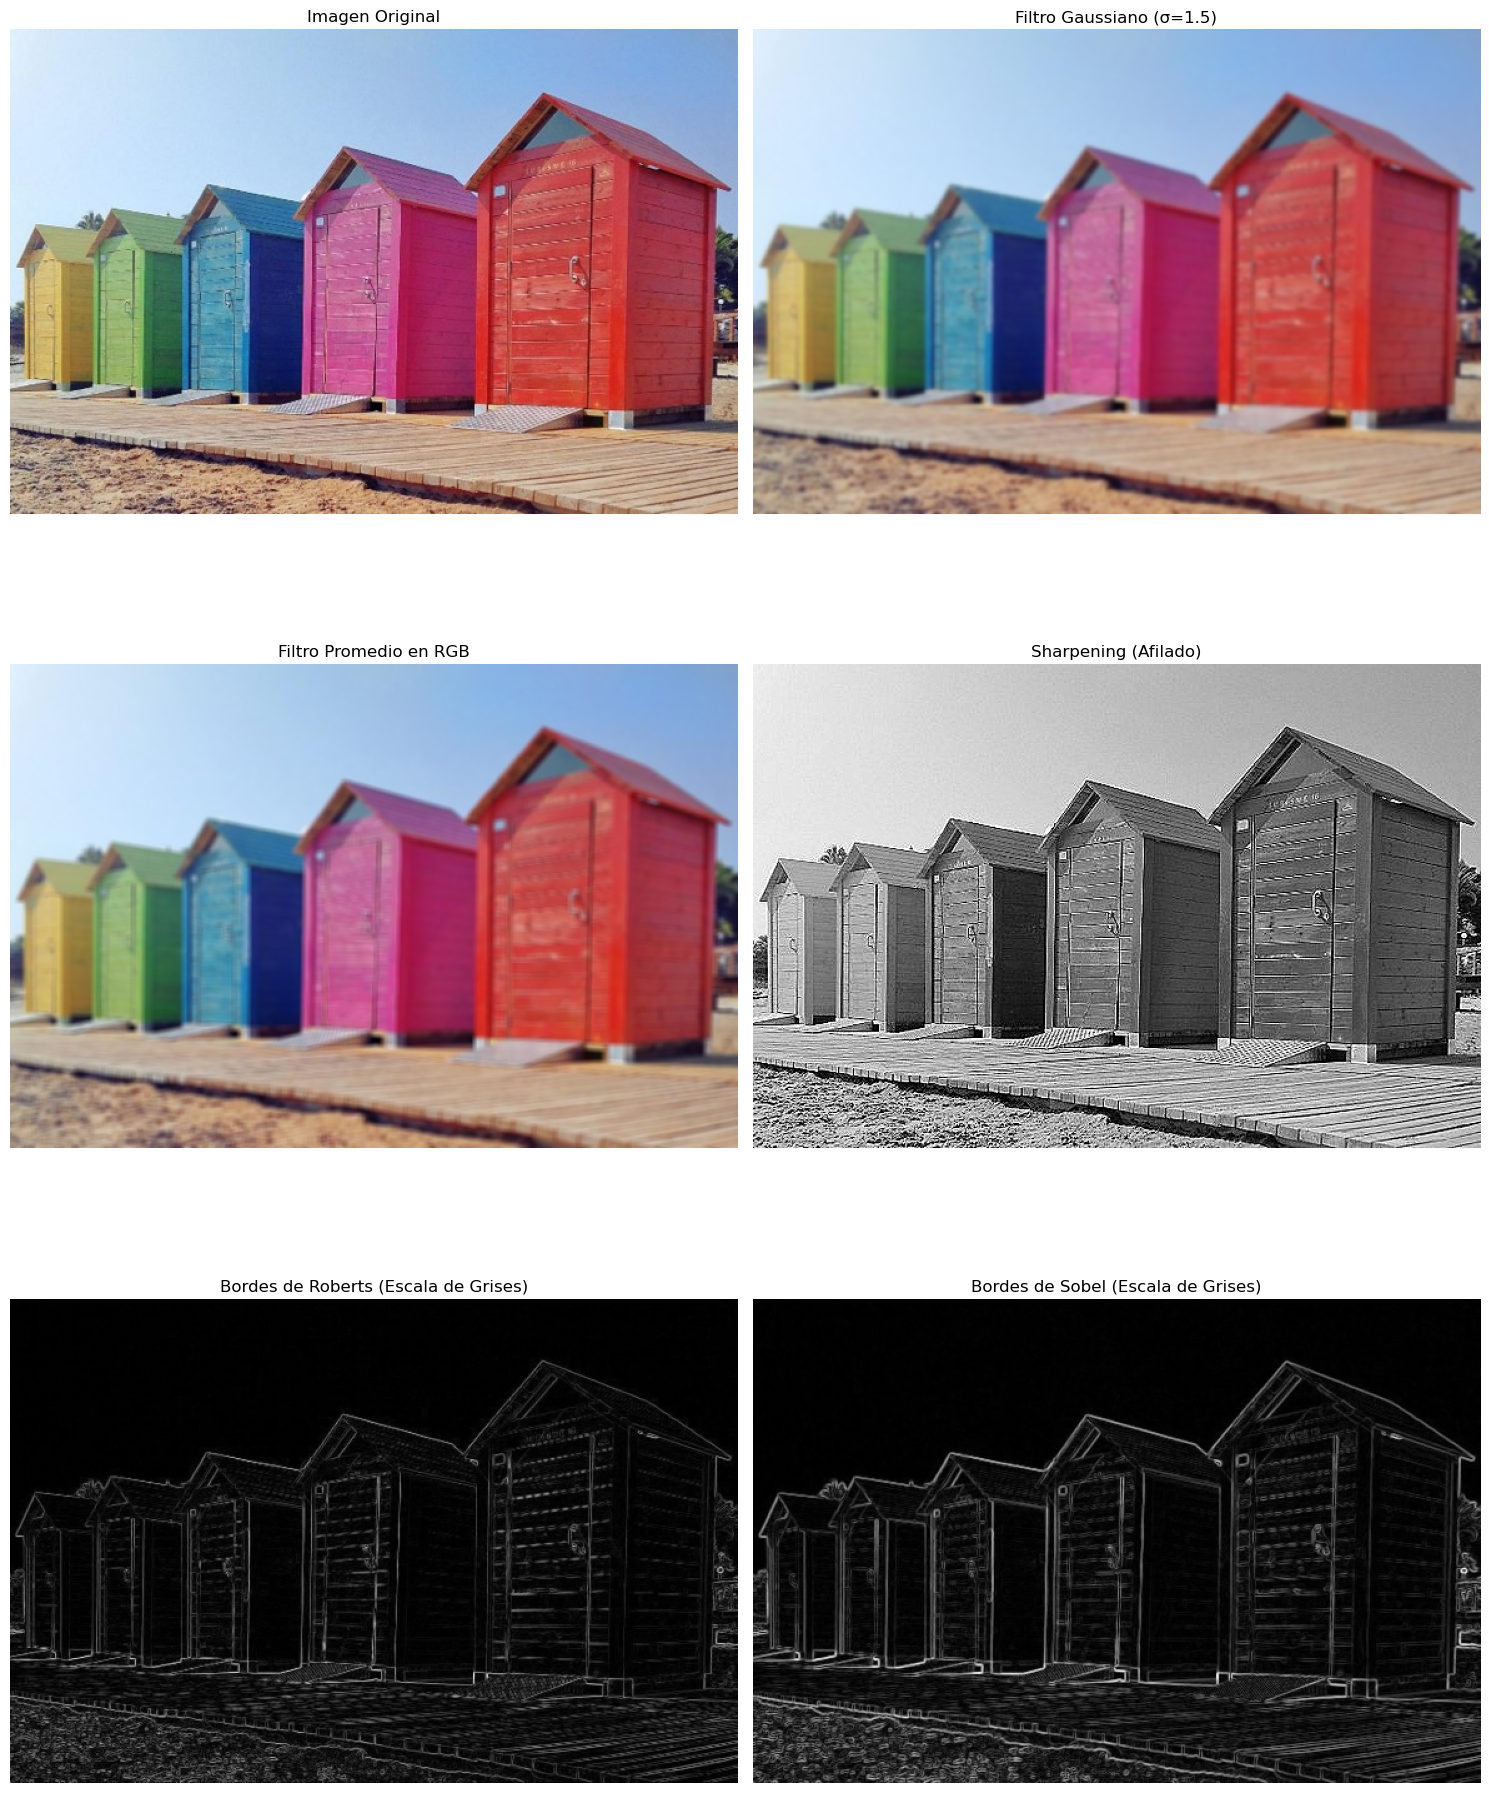

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.filters import gaussian, sobel
from skimage.color import rgb2gray
from skimage.exposure import rescale_intensity
from skimage.feature import canny
from scipy import ndimage

# Cargar imagen RGB
DATOS_DIR = 'Datos/'
imagen = io.imread(DATOS_DIR + 'Casitas.jpg')

# filtro gaussiano a cada canal
sigma = 1.5  # Ajusta este valor para más o menos suavizado
gaussiano = gaussian(imagen, sigma=sigma, channel_axis=-1)

# Filtro promedio en RGB (suavizado)
kernel_promedio = np.ones((5, 5)) / 25
promedio = np.zeros_like(imagen)
for i in range(3):  # Aplicar el filtro a cada canal RGB
    promedio[..., i] = ndimage.convolve(imagen[..., i], kernel_promedio)

# Conversión a escala de grises
imagen_gris = rgb2gray(imagen)

# Filtro de bordes de Roberts
roberts_cross_v = np.array([[1, 0], [0, -1]])
roberts_cross_h = np.array([[0, 1], [-1, 0]])
edges_roberts = np.sqrt(
    ndimage.convolve(imagen_gris, roberts_cross_v) ** 2 +
    ndimage.convolve(imagen_gris, roberts_cross_h) ** 2
)

sobel_imagen = sobel(imagen_gris)

# Ajustar el kernel de sharpening
kernel_sharpen = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])

sharpened_g = ndimage.convolve(imagen_gris, kernel_sharpen)
sharpened = np.clip(sharpened_g*255, 0, 255).astype(np.uint8)

# Crear una figura con subfiguras de 3 filas y 2 columnas
fig, axes = plt.subplots(3, 2, figsize=(15, 20))

# Asegurarse de que axes sea una matriz 2D
axes = axes.flatten()

# Visualización de cada imagen en una subfigura
imagenes = [imagen, gaussiano, np.clip(promedio, 0, 255).astype(np.uint8), sharpened, edges_roberts, sobel_imagen]
titulos = ['Imagen Original', f'Filtro Gaussiano (σ={sigma})', 'Filtro Promedio en RGB', 'Sharpening (Afilado)', 'Bordes de Roberts (Escala de Grises)', 'Bordes de Sobel (Escala de Grises)']

for i, ax in enumerate(axes):
    ax.imshow(imagenes[i], cmap='gray' if i >= 3 else None)
    ax.set_title(titulos[i])
    ax.axis('off')

plt.tight_layout()
plt.show()

## Operaciones que utilizan Filtros

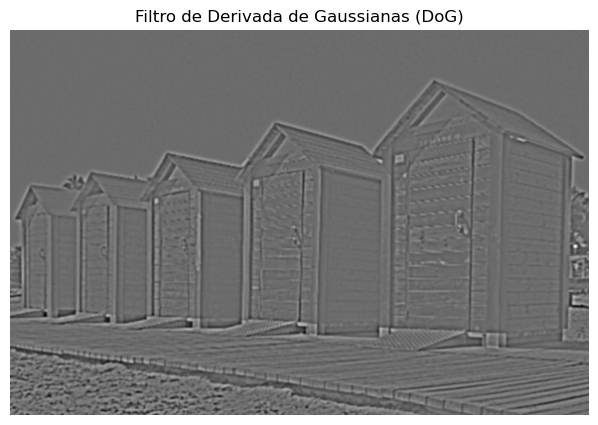

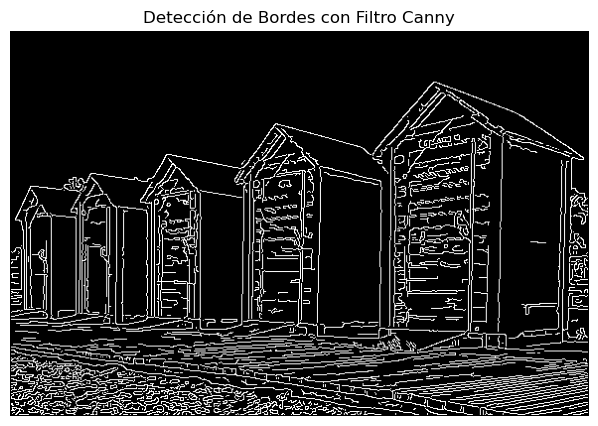

In [17]:
from skimage.feature import canny


# Conversión a escala de grises
imagen_gris = rgb2gray(imagen)

# Filtro Canny para detección de bordes
edges_canny = canny(imagen_gris, sigma=1)

# Filtro de Derivada de Gaussianas (DoG)
sigma1 = 1
sigma2 = 2  # Sigma más grande para la segunda Gaussian
gauss1 = gaussian(imagen_gris, sigma=sigma1)
gauss2 = gaussian(imagen_gris, sigma=sigma2)
DoG = gauss1 - gauss2

# Visualización del Filtro de Derivada de Gaussianas (DoG)
plt.figure(figsize=(10, 5))
plt.imshow(DoG, cmap='gray')
plt.title('Filtro de Derivada de Gaussianas (DoG)')
plt.axis('off')


# Filtro Canny para detección de bordes
plt.figure(figsize=(10, 5))
plt.imshow(edges_canny, cmap='gray')
plt.title('Detección de Bordes con Filtro Canny')
plt.axis('off')

plt.show()


## Ejemplo de Traslación

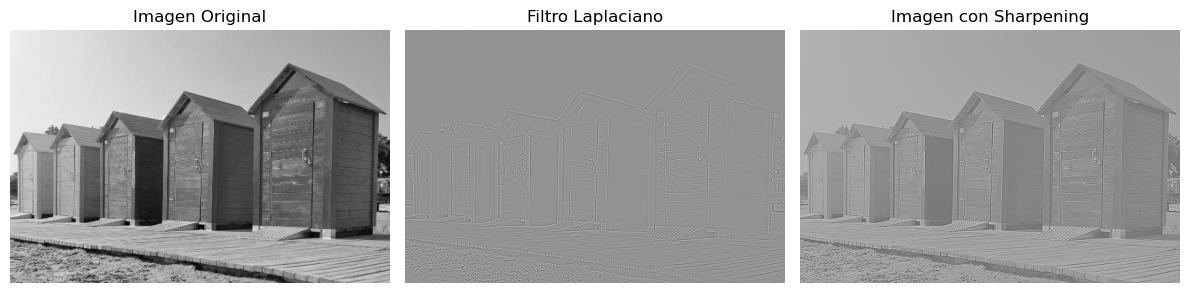

In [47]:
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from skimage.filters import laplace
from skimage.io import imread
from skimage.color import rgb2gray

# Cargar una imagen
image = imagen
image_gray = rgb2gray(image)

# Aplicar el filtro Laplaciano para detectar bordes
laplacian_filtered = laplace(image_gray)

# Hacer el sharpening sumando la imagen original con la imagen filtrada por el Laplaciano
sharpened_image = image_gray + laplacian_filtered

# Mostrar los resultados
fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image_gray, cmap='gray')
ax[0].set_title('Imagen Original')

ax[1].imshow(laplacian_filtered, cmap='gray')
ax[1].set_title('Filtro Laplaciano')

ax[2].imshow(sharpened_image, cmap='gray')
ax[2].set_title('Imagen con Sharpening')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()


## Ejemplo de Brillo

In [ ]:
brightness_factors = [0.5, 1.5, 2.0] # factores de brillo

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.flatten()

axs[0].imshow(imgColor)
axs[0].set_title('Imagen Original')
axs[0].axis('off')  # Ocultar ejes

for i, factor in enumerate(brightness_factors):
    # Ajusta brillo de la imagen
    imgBright = np.clip(imgColor * factor, 0, 255).astype(np.uint8)

    axs[i + 1].imshow(imgBright)
    axs[i + 1].set_title(f'Brillo {factor}x')
    axs[i + 1].axis('off')  # Ocultar ejes

plt.show()

## Ejemplo de Constraste

In [ ]:
from skimage import exposure
contrast_factors = [0.5, 1.5, 2.0] # factores de contraste

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.flatten()

axs[0].imshow(imgColor)
axs[0].set_title('Imagen Original')
axs[0].axis('off')  # Ocultar ejes

for i, factor in enumerate(contrast_factors):
    # Ajusta contraste de la imagen
    imgContrast = exposure.adjust_gamma(imgColor, gamma=1/factor)
    
    axs[i + 1].imshow(imgContrast)
    axs[i + 1].set_title(f'Contraste {factor}x')
    axs[i + 1].axis('off')  # Ocultar ejes

plt.show()